In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.105  Python-3.8.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24564MiB)
Setup complete  (20 CPUs, 31.8 GB RAM, 1230.2/1861.9 GB disk)


In [4]:
import os

PATH = 'Training/Training_라벨링데이터'

for path1 in os.listdir(PATH):
    for path2 in os.listdir(os.path.join(PATH, path1)):
        for path3 in os.listdir(os.path.join(PATH, path1, path2)):
            for path4 in os.listdir(os.path.join(PATH, path1, path2, path3)):
                print(path4)
                print(os.path.join(PATH, path1, path2, path3, path4))
            break
        break
    break

11_X001_C012_1215_0.Json
Training/Training_라벨링데이터\가구류\밥상\11_X001_C012_1215\11_X001_C012_1215_0.Json
11_X001_C012_1215_1.Json
Training/Training_라벨링데이터\가구류\밥상\11_X001_C012_1215\11_X001_C012_1215_1.Json
11_X001_C012_1215_2.Json
Training/Training_라벨링데이터\가구류\밥상\11_X001_C012_1215\11_X001_C012_1215_2.Json
11_X001_C012_1215_3.Json
Training/Training_라벨링데이터\가구류\밥상\11_X001_C012_1215\11_X001_C012_1215_3.Json
11_X001_C012_1215_4.Json
Training/Training_라벨링데이터\가구류\밥상\11_X001_C012_1215\11_X001_C012_1215_4.Json


In [100]:
def read_json(json_file):
    # JSON 파일 읽기 (UTF-8 인코딩)
    with open(json_file, encoding='utf-8') as f:
        data = json.load(f)
    
        # 필요한 값 추출
        file_name = data["FILE NAME"]
        boundings = []
        for bounding in data["Bounding"]:
            class_name = bounding["CLASS"]
            try:
                x1 = bounding["x1"]
                y1 = bounding["y1"]
                x2 = bounding["x2"]
                y2 = bounding["y2"]
            except:
                x_values = []
                y_values = []

                PolygonPoints = []

                for PolygonPoint in bounding["PolygonPoint"]:
                    PolygonPoints.append(list(PolygonPoint.values()))

                # x, y 좌표 추출
                for point in PolygonPoints:
                    x, y = map(int, point[0].split(","))
                    x_values.append(x)
                    y_values.append(y)

                # 최소, 최대 값 추출
                x1 = min(x_values)
                y1 = min(y_values)
                x2 = max(x_values)
                y2 = max(y_values)
            boundings.append([class_name, [str(x1), str(y1), str(x2), str(y2)]])
    
    return file_name, boundings

In [101]:
import os
import json
from collections import defaultdict
from tqdm import tqdm

PATH = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training_라벨링데이터'
#PATH = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training_라벨링데이터\\가구류'

yolo_dict = defaultdict(list)

for root, dirs, files in tqdm(os.walk(PATH)):
    for file in files:
        Path = os.path.join(root, file)
        file_name, boundings = read_json(Path)
        
        for bounding in boundings:
            class_name, coordinate = bounding
            x1, y1, x2, y2 = coordinate
            file_class = class_name
            if class_name == '가구류':
                file_class = '0'
            if class_name == '고철류':
                file_class = '1'
            if class_name == '나무류':
                file_class = '2'
            if class_name == '도기류':
                file_class = '3'
            if class_name == '비닐류':
                file_class = '4'
            if class_name == '스티로폼류':
                file_class = '5'
            if class_name == '유리병류':
                file_class = '6'
            if class_name == '의류':
                file_class = '7'
            if class_name == '자전거':
                file_class = '8'
            if class_name == '전자제품':
                file_class = '9'
            if class_name == '종이류':
                file_class = '10'
            if class_name == '캔류':
                file_class = '11'
            if class_name == '페트병류':
                file_class = '12'
            if class_name == '플라스틱류':
                file_class = '13'
            if class_name == '형광등':
                file_class = '14'
            yolo_dict[file_name].append([file_class] + coordinate)
        
print('finish')

122022it [00:53, 2287.49it/s]

finish


In [102]:
import pandas as pd

index = yolo_dict.keys()
columns = ['labels']

df = pd.DataFrame(columns=columns, index=index)
df.head()

,labels
11_X001_C012_1215_0.jpg,NaN
11_X001_C012_1215_1.jpg,NaN
11_X001_C012_1215_2.jpg,NaN
11_X001_C012_1215_3.jpg,NaN
11_X001_C012_1215_4.jpg,NaN


In [103]:
yolo_dict[str(key)]

[['0', '320', '192', '523', '731'],
 ['0', '534', '142', '1513', '1383'],
 ['10', '58', '408', '276', '578']]

In [104]:
for key in list(index):
    s = []
    for label in yolo_dict[str(key)]:
        s.append(','.join(label))
    df.loc[str(key)][columns] = ' '.join(s)
df.head()

                                      labels
11_X001_C012_1215_0.jpg  0,547,352,1460,1042
11_X001_C012_1215_1.jpg  0,441,383,1536,1276
11_X001_C012_1215_2.jpg  0,621,140,1607,1226
11_X001_C012_1215_3.jpg  0,533,240,1735,1431
11_X001_C012_1215_4.jpg  0,358,204,1571,1440


In [106]:
#df.to_csv('재활용 xyxy label 수정.csv')

In [105]:
df

,labels
11_X001_C012_1215_0.jpg,"0,547,352,1460,1042"
11_X001_C012_1215_1.jpg,"0,441,383,1536,1276"
11_X001_C012_1215_2.jpg,"0,621,140,1607,1226"
11_X001_C012_1215_3.jpg,"0,533,240,1735,1431"
11_X001_C012_1215_4.jpg,"0,358,204,1571,1440"
...,...
25_X133_C318_1214_0.jpg,"14,652,353,1446,1164"
25_X133_C318_1214_1.jpg,"14,628,393,1552,932"
25_X133_C318_1214_2.jpg,"14,657,296,1382,692"
25_X133_C318_1214_3.jpg,"14,716,444,1271,835"


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('재활용 xyxy label 수정.csv', index_col=0)

In [107]:
df.head()

,labels
11_X001_C012_1215_0.jpg,"0,547,352,1460,1042"
11_X001_C012_1215_1.jpg,"0,441,383,1536,1276"
11_X001_C012_1215_2.jpg,"0,621,140,1607,1226"
11_X001_C012_1215_3.jpg,"0,533,240,1735,1431"
11_X001_C012_1215_4.jpg,"0,358,204,1571,1440"


In [108]:
from collections import defaultdict

In [16]:
yolo_dict = defaultdict(list)

In [24]:
for index in df.index:
    yolo_dict[index] = df.loc[index]

In [6]:
import os
import shutil
a = []
PATH = 'Training'
for root, dirs, files in os.walk(PATH):
    for file in files:
        if file.endswith('_0.jpg') or file.endswith('_0.txt'):
            continue
        Path = os.path.join(root, file)
        if file == 'Untitled-checkpoint.ipynb':
            continue
        try:
            shutil.move(Path, 'dummy')
        except:
            continue
print('finish')

finish


In [14]:
# import os
# import shutil

# PATH = 'Training'

# for root, dirs, files in os.walk(PATH):
#     for file in files:
#         Path = os.path.join(root, file)
#         if file == 'Untitled-checkpoint.ipynb':
#             continue
#         try:
#             shutil.move(Path, PATH)
#         except:
#             continue
# print('finish')

finish


In [2]:
import pandas as pd

df = pd.read_csv('재활용 xyxy label 수정.csv', index_col=0)

In [11]:
df.head()

,labels
11_X001_C012_1215_0.jpg,"0,547,352,1460,1042"
11_X001_C012_1215_1.jpg,"0,441,383,1536,1276"
11_X001_C012_1215_2.jpg,"0,621,140,1607,1226"
11_X001_C012_1215_3.jpg,"0,533,240,1735,1431"
11_X001_C012_1215_4.jpg,"0,358,204,1571,1440"


In [12]:
import os
import json
from PIL import Image
from collections import defaultdict

PATH = 'Training'

yolo = defaultdict(list)

for root, dirs, files in os.walk(PATH):
    for file in files:
        if file.endswith('_0.jpg'):
            Path = os.path.join(root, file)

            # 이미지 열기
            image = Image.open(Path)

            # 이미지의 크기 확인
            image_width, image_height = image.size
            
            f = open(''.join(Path.split('.')[:-1]) + f".txt", 'w')
            
            for label in list(df.loc[file])[0].split(' '):
                file_class, x1, y1, x2, y2 = map(int, label.split(','))

                x = (x1 + x2) / (2 * image_width)
                y = (y1 + y2) / (2 * image_height)
                w = (x2 - x1) / image_width
                h = (y2 - y1) / image_height
                
                yolo[Path].append([str(file_class)] + [str(x1), str(y1), str(x2), str(y2)])
                
                f.write(f"{file_class} {x} {y} {w} {h}\n")
                
            f.close()

                
print('finish')

finish


In [13]:
import os
import json
from PIL import Image
from collections import defaultdict

PATH = 'dummy'

for root, dirs, files in os.walk(PATH):
    for file in files:
        if file.endswith('.jpg'):
            Path = os.path.join(root, file)

            # 이미지 열기
            image = Image.open(Path)

            # 이미지의 크기 확인
            image_width, image_height = image.size
            
            f = open(''.join(Path.split('.')[:-1]) + f".txt", 'w')
            
            for label in list(df.loc[file])[0].split(' '):
                file_class, x1, y1, x2, y2 = map(int, label.split(','))
            
                x = (x1 + x2) / (2 * image_width)
                y = (y1 + y2) / (2 * image_height)
                w = (x2 - x1) / image_width
                h = (y2 - y1) / image_height
                
                yolo[Path].append([str(file_class)] + [str(x1), str(y1), str(x2), str(y2)])
                
                f.write(f"{file_class} {x} {y} {w} {h}\n")
                
            f.close()
                
print('finish')

finish


In [14]:
len(list(yolo.keys()))

609927

In [123]:
import pandas as pd

index = yolo.keys()
columns = ['labels']

df = pd.DataFrame(columns=columns, index=index)
df.head()

,labels
Training\11_X001_C012_1215_0.jpg,NaN
Training\11_X001_C012_1217_0.jpg,NaN
Training\11_X001_C013_1030_0.jpg,NaN
Training\11_X001_C013_1214_0.jpg,NaN
Training\11_X001_C013_1218_0.jpg,NaN


In [131]:
for key in list(index):
    s = []
    for label in yolo[str(key)]:
        s.append(','.join(label))
    df.loc[str(key)][columns] = ' '.join(s)
df.head()

,labels
Training\11_X001_C012_1215_0.jpg,"0,547,352,1460,1042"
Training\11_X001_C012_1217_0.jpg,"0,309,81,1450,1226"
Training\11_X001_C013_1030_0.jpg,"0,703,31,1285,1080"
Training\11_X001_C013_1214_0.jpg,"0,250,157,1453,1043"
Training\11_X001_C013_1218_0.jpg,"0,246,32,1779,987"


In [132]:
df.to_csv('재활용 xyxy label 수정 상대좌표와 path 추가.csv')

In [ ]:
polygon_points = points
x_values = []
y_values = []

# x, y 좌표 추출
for point in polygon_points:
    x, y = map(int, list(point.values())[0].split(","))
    x_values.append(x)
    y_values.append(y)

# 최소, 최대 값 추출
x1 = min(x_values)
y1 = min(y_values)
x2 = max(x_values)
y2 = max(y_values)

# xyxy 좌표 출력
xyxy_coordinates = (x1, y1, x2, y2)
print("xyxy coordinates:", xyxy_coordinates)

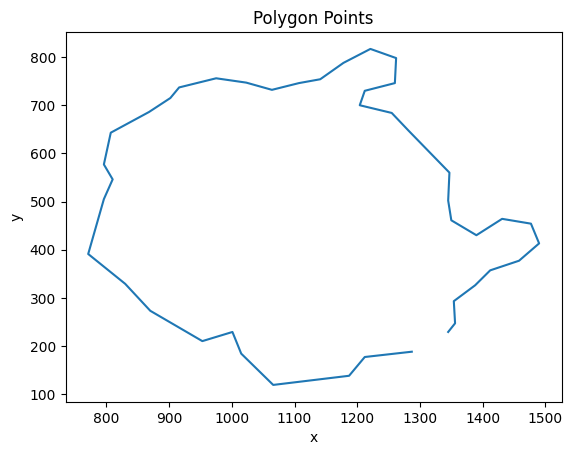

In [43]:
import matplotlib.pyplot as plt

# x, y 좌표 추출
x_values = []
y_values = []
for point in points:
    x, y = map(int, list(point.values())[0].split(","))
    x_values.append(x)
    y_values.append(y)

# 그래프 그리기
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polygon Points")
plt.show()


In [ ]:
# 가구류 0 
# 고철류 1
# 나무 2
# 도기류 3
# 비닐 4
# 스티로폼 5
# 유리병 6
# 의류 7
# 자전거 8
# 전자제품 9
# 종이류 10
# 캔류 11
# 페트병 12
# 플라스틱류 13
# 형광등 14

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.112  Python-3.8.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24564MiB)
Setup complete  (20 CPUs, 31.8 GB RAM, 1288.4/1861.9 GB disk)


In [1]:
from ultralytics import YOLO

# Load the model
#model = YOLO('yolov8m.pt') # load a pretrained model
model = YOLO('yolov8m.yaml').load('yolov8m.pt')

#yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [1]:
from ultralytics import YOLO

model = YOLO('C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\runs\\detect\\train22\\weights\\last.pt')

In [2]:
# Train the model
results = model.train(
    data='./sesac.yaml',
    pretrained=True,
    epochs=100,
    save_period=1,
    optimizer='AdamW',
    name='train22',
    batch=32,
    device=0,
    seed=42,
    lr0=3e-3,
    label_smoothing=0.05,
    workers=8,
    #exist_ok=True,
    resume=True,
    patience=3,
    imgsz=640,
    cos_lr=True,
    val=True
)

In [2]:
results = model.val(data='./sesac.yaml',)  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.112  Python-3.8.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24564MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients
val: Scanning C:\Users\juntae\sesac\datasets\aihub\waste\dummy.cache... 489704 images, 0 backgrounds, 0 corrupt: 100%|█
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\14_X016_C055_1203_1.jpg: 1 duplicate labels removed
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\15_X018_C173_1112_2.jpg: 1 duplicate labels removed
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\16_X009_C169_1209_1.jpg: 1 duplicate labels removed
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\18_X010_C208_1111_1.jpg: 1 duplicate labels removed
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\18_X013_C172_1203_4.jpg: 1 duplicate labels removed
val: WARNING  C:\Users\juntae\sesac\datasets\aihub\waste\dummy\19_X007_C012_1116_2.jpg: 1 duplicate labels removed
                 Class 

In [2]:
Path = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste'

In [60]:
img1 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C012_1215_0.jpg'
img2 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C023_0119_0.jpg'
img3 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\24_X001_C014_1204_3.jpg'
img4 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\24_X001_C331_1208_4.jpg'
img5 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\24_X005_C053_1216_0.jpg'
img6 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\21_X053_C203_1007_4.jpg'
img7 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\17_X358_C976_0331_4.jpg'
img8 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Validation\\25_X053_C501_1130_4.jpg'


In [61]:
inputs = [img8]  # list of numpy arrays
results = model(inputs)  # list of Results objects

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [62]:
bboxes = []
annotations = []
fileName = img8

for box in boxes:
    x1, y1, x2, y2 = box.xyxy.cpu().detach().numpy()[0]
    conf = box.conf.cpu().detach().numpy()
    cls = box.cls.cpu().detach().numpy()
    bboxes.append([int(cls), float(conf), int(float(x1)), int(float(y1)), int(float(x2)), int(float(y2))])
    annotations.append({'fileName':fileName,'bboxes':bboxes})
    print(cls, conf, x1, y1, x2, y2)

In [63]:
import os
import cv2

In [64]:
mapper_cls = {
    0: 'Furniture',
    1: 'Metal',
    2: 'Tree',
    3: 'Ceramic',
    4: 'Vinyl',
    5: 'Styrofoam',
    6: 'Glass',
    7: 'Clothing',
    8: 'Bicycle',
    9: 'Electronic',
    10: 'Paper',
    11: 'Can',
    12: 'PET',
    13: 'Plastic',
    14: 'FluorescentLight'
}

# 클래스 인덱스에 따른 boundingBox 의 색상을 정의합니다.
mapper_color = {
    0: (255, 0, 0),
    1: (0, 255, 0),
    2: (0, 0, 255),
    3: (255, 255, 0),
    4: (255, 0, 255),
    5: (0, 255, 255),
    6: (255, 255, 255),
    7: (128, 128, 0),
    8: (128, 0, 128),
    9: (0, 128, 128),
    10: (0, 0, 128),
    11: (0, 128, 0),
    12: (128, 0, 0),
    13: (128, 128, 128),
    14: (0, 128, 255)
}

In [65]:
#annotations.append({'fileName':fileName,'bboxes':bboxes})

# 한 이미지에 표현된 boundingBox를 시각화합니다.
idx = 0
idx_max = len(annotations)
while True:
    annotation = annotations[idx]
    imagePath = fileName
    frame = cv2.imread(imagePath, cv2.IMREAD_COLOR)

    # draw image name
    frame = cv2.putText(frame, f"{annotation['fileName']}", (10, 22), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    # draw bboxes
    for id,confidence, x1, y1, x2, y2 in annotation["bboxes"]:
        frame = cv2.rectangle(frame, (x1,y1), (x2,y2), mapper_color[id], 2)
        frame = cv2.putText(frame, f"{mapper_cls[id]}", (x1, y1-10), cv2.FONT_HERSHEY_COMPLEX, 3,  mapper_color[id], 3)
    small_frame = cv2.resize(frame, (1000, 1000))
    # Visualize image
    cv2.imshow('frame', small_frame)

    # Weight keyboard event
    key = cv2.waitKeyEx(0)
    if key==0x270000: # right Key : 인덱스를 1칸 앞으로 이동시킵니다.
        idx = min(idx+1, idx_max)
    elif key==0x250000: # left Key : 인덱스를 1칸 뒤로 이동시킵니다.
        idx = max(idx-1, 0)
    elif key==0x260000: # up Key : 인덱스를 10칸 앞으로 이동시킵니다.
        idx = min(idx+10, idx_max)
    elif key==0x280000: # down Key : 인덱스를 10칸 뒤로 이동시킵니다.
        idx = max(idx-10, 0)
    elif key==0x1B: # esc Key : 프로세스를 종료합니다.
        cv2.destroyAllWindows() 
        break
    elif key==115: # S Key : 현재 표시되는 시각화된 이미지를 저장합니다.
        cv2.imwrite(annotation["fileName"], frame)

In [ ]:
img1 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C012_1215_0.jpg'
txt1 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C012_1215_0.txt'
img2 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C023_0119_0.jpg'
txt2 = 'C:\\Users\\juntae\\sesac\\datasets\\aihub\\waste\\Training\\11_X001_C023_0119_0.txt'

In [ ]:
import cv2

def draw_boxes_on_image(image_path, txt_path):
    # 이미지 로드
    image = cv2.imread(image_path)

    # 텍스트 파일 열기
    with open(txt_path, 'r') as file:
        lines = file.readlines()

    # 각 줄에서 좌표와 레이블을 읽어들여 박스 그리기
    for line in lines:
        line = line.strip().split()
        label = line[0]
        x, y, w, h = map(float, line[1:])

        # 좌표를 이미지 크기에 맞게 변환
        height, width, _ = image.shape
        x1 = int((x - w / 2) * width)
        y1 = int((y - h / 2) * height)
        x2 = int((x + w / 2) * width)
        y2 = int((y + h / 2) * height)

        # 박스 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 이미지 보여주기
    cv2.imshow('Image with Boxes', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지 파일 경로와 텍스트 파일 경로
image_path = img2
txt_path = txt2

# 박스 그리기 함수 호출
draw_boxes_on_image(image_path, txt_path)
